In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("athyg_31_reduced_m10.csv")
print(df)

             id          tyc          gaia  hyg  hip        hd  hr   gl bayer  \
0             1          NaN           NaN  0.0  NaN       NaN NaN  NaN   NaN   
1             2   4669-731-1  2.443095e+18  NaN  NaN  224701.0 NaN  NaN   NaN   
2             3      1-381-1           NaN  1.0  1.0  224700.0 NaN  NaN   NaN   
3            14   2259-803-1  2.873721e+18  NaN  NaN       NaN NaN  NaN   NaN   
4            21  5841-1155-1  2.341872e+18  2.0  2.0  224690.0 NaN  NaN   NaN   
...         ...          ...           ...  ...  ...       ...  ..  ...   ...   
330336  2552081    4289-26-1  2.016188e+18  NaN  NaN       NaN NaN  NaN   NaN   
330337  2552089  4487-1146-1  2.227799e+18  NaN  NaN  224698.0 NaN  NaN   NaN   
330338  2552100   5837-533-1  2.421128e+18  NaN  NaN       NaN NaN  NaN   NaN   
330339  2552111  6411-1196-1  2.341838e+18  NaN  NaN  224691.0 NaN  NaN   NaN   
330340  2552118  6988-1291-1  2.333400e+18  NaN  NaN  224694.0 NaN  NaN   NaN   

        flam  ...      rv r

In [6]:
columns_to_keep = ['id','hip', 'dist', 'x0', 'y0', 'z0', 'absmag', 'mag', 'vx', 'vy', 'vz', 'spect']
df = df[columns_to_keep]

print(df)

             id  hip       dist           x0     y0        z0  absmag     mag  \
0             1  NaN     0.0000     0.000005  0.000     0.000   4.850 -26.700   
1             2  NaN   509.1956   506.856000  0.003   -48.754   0.705   9.239   
2             3  1.0   219.7802   219.741000  0.003     4.177   2.390   9.100   
3            14  NaN   817.1342   696.482000  0.041   427.341  -0.548   9.013   
4            21  2.0    37.3164    35.176000  0.003   -12.456   6.411   9.270   
...         ...  ...        ...          ...    ...       ...     ...     ...   
330336  2552081  NaN  2931.5317  1284.928000 -0.424  2634.926  -2.594   9.741   
330337  2552089  NaN   297.8780    88.998000 -0.027   284.272   0.791   8.161   
330338  2552100  NaN   177.7927   173.282000 -0.047   -39.793   3.528   9.778   
330339  2552111  NaN   212.4770   199.617000 -0.042   -72.797   2.917   9.554   
330340  2552118  NaN   642.0524   568.439000 -0.101  -298.509   0.126   9.164   

            vx      vy     

In [20]:
nan_check_columns = ['x0', 'y0', 'z0', 'vx', 'vy', 'vz', 'spect']

# Check if any NaN values exist in the specified columns
rows_with_nan = df[nan_check_columns].isna().any(axis=1)

# Display rows with NaN values (if any)
df_rows_with_nan = df[rows_with_nan]

df['hip'].fillna(0, inplace=True)



In [21]:
# Remove rows with NaN values in specific columns
df = df.dropna(subset=nan_check_columns)
df['spect'] = df['spect'].str[0]
valid_spectral_classes = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Remove rows with invalid 'spect' values
df = df[df['spect'].isin(valid_spectral_classes)]

In [22]:
nan_hip_count = df['hip'].isna().sum()

# Display the count
print(f"Number of rows where 'hip' is NaN: {nan_hip_count}")

Number of rows where 'hip' is NaN: 0


In [23]:
# Specify the path where you want to save the CSV file
csv_file_path = 'processed_STAR_31_m10.csv'

# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Display a message indicating the export is successful
print(f'DataFrame has been exported to: {csv_file_path}')

DataFrame has been exported to: processed_STAR_31_m10.csv


In [32]:
exo_df = pd.read_csv("StreamingAssets/processed_exoplanets.csv")
print(exo_df)

     hip_name  sy_pnum
0       60202        1
1       74793        1
2      116076        1
3       79248        2
4       96901        1
..        ...      ...
714     67275        1
715      8102        4
716     34693        1
717      7513        3
718     97938        1

[719 rows x 2 columns]


In [33]:
exo_df = exo_df.dropna(subset=['hip_name'])
print(exo_df)

     hip_name  sy_pnum
0       60202        1
1       74793        1
2      116076        1
3       79248        2
4       96901        1
..        ...      ...
714     67275        1
715      8102        4
716     34693        1
717      7513        3
718     97938        1

[719 rows x 2 columns]


In [34]:
exo_df = exo_df.drop_duplicates(subset=['hip_name', 'sy_pnum'])
print(exo_df)

     hip_name  sy_pnum
0       60202        1
1       74793        1
2      116076        1
3       79248        2
4       96901        1
..        ...      ...
714     67275        1
715      8102        4
716     34693        1
717      7513        3
718     97938        1

[717 rows x 2 columns]


In [36]:

exo_df['hip_name'] = exo_df['hip_name'].str.replace('HIP ', '')

print(exo_df)

AttributeError: Can only use .str accessor with string values!

In [30]:
# Specify the path where you want to save the CSV file
csv_file_path = 'StreamingAssets/processed_exoplanets_final.csv'

# Export the DataFrame to a CSV file
exo_df.to_csv(csv_file_path, index=False)

# Display a message indicating the export is successful
print(f'DataFrame has been exported to: {csv_file_path}')

DataFrame has been exported to: StreamingAssets/processed_exoplanets.csv


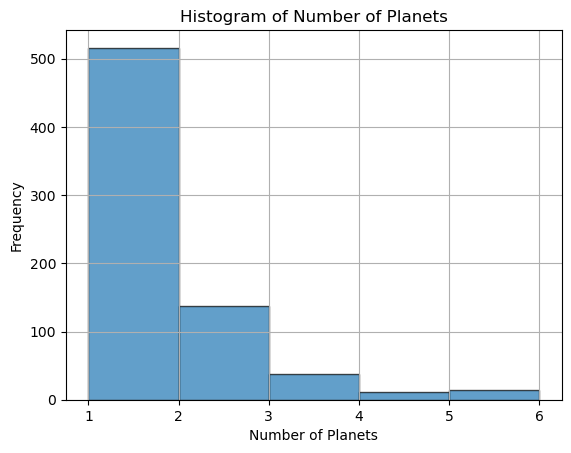

In [37]:
plt.hist(exo_df['sy_pnum'], bins=range(min(exo_df['sy_pnum']), max(exo_df['sy_pnum']) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Planets')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Planets')
plt.xticks(range(min(exo_df['sy_pnum']), max(exo_df['sy_pnum']) + 1))
plt.grid(True)
plt.show()

In [3]:
og_df = pd.read_csv("StreamingAssets/starData.csv")
print(og_df);

             id    hip       dist        x0     y0        z0  absmag     mag  \
0             1 -999.0     0.0000     0.000  0.000     0.000   4.850 -26.700   
1             2    NaN   509.1956   506.856  0.003   -48.754   0.705   9.239   
2             3    1.0   219.7802   219.741  0.003     4.177   2.390   9.100   
3            14    NaN   817.1342   696.482  0.041   427.341  -0.548   9.013   
4            21    2.0    37.3164    35.176  0.003   -12.456   6.411   9.270   
...         ...    ...        ...       ...    ...       ...     ...     ...   
272848  2552081    NaN  2931.5317  1284.928 -0.424  2634.926  -2.594   9.741   
272849  2552089    NaN   297.8780    88.998 -0.027   284.272   0.791   8.161   
272850  2552100    NaN   177.7927   173.282 -0.047   -39.793   3.528   9.778   
272851  2552111    NaN   212.4770   199.617 -0.042   -72.797   2.917   9.554   
272852  2552118    NaN   642.0524   568.439 -0.101  -298.509   0.126   9.164   

                  vx        vy        v

In [39]:

exo_df['hip_name'] = exo_df['hip_name'].astype('int64')
print(exo_df)

     hip_name  sy_pnum
0       60202        1
1       74793        1
2      116076        1
3       79248        2
4       96901        1
..        ...      ...
714     67275        1
715      8102        4
716     34693        1
717      7513        3
718     97938        1

[717 rows x 2 columns]


In [42]:
merged_df = pd.merge(og_df, exo_df, left_on='hip', right_on='hip_name', how='left')
merged_df.drop('hip_name', axis=1, inplace=True)
merged_df['sy_pnum'].fillna(0, inplace=True)
print(merged_df);

             id  hip       dist           x0     y0        z0  absmag     mag  \
0             1    0     0.0000     0.000005  0.000     0.000   4.850 -26.700   
1             2    0   509.1956   506.856000  0.003   -48.754   0.705   9.239   
2             3    1   219.7802   219.741000  0.003     4.177   2.390   9.100   
3            14    0   817.1342   696.482000  0.041   427.341  -0.548   9.013   
4            21    2    37.3164    35.176000  0.003   -12.456   6.411   9.270   
...         ...  ...        ...          ...    ...       ...     ...     ...   
272848  2552081    0  2931.5317  1284.928000 -0.424  2634.926  -2.594   9.741   
272849  2552089    0   297.8780    88.998000 -0.027   284.272   0.791   8.161   
272850  2552100    0   177.7927   173.282000 -0.047   -39.793   3.528   9.778   
272851  2552111    0   212.4770   199.617000 -0.042   -72.797   2.917   9.554   
272852  2552118    0   642.0524   568.439000 -0.101  -298.509   0.126   9.164   

            vx      vy     

In [43]:
# Specify the path where you want to save the CSV file
csv_file_path = 'StreamingAssets/really_final_starlight_dataset.csv'

# Export the DataFrame to a CSV file
merged_df.to_csv(csv_file_path, index=False)

# Display a message indicating the export is successful
print(f'DataFrame has been exported to: {csv_file_path}')

DataFrame has been exported to: StreamingAssets/final_starlight_dataset.csv
